**Import database**

In [ ]:
from google.colab import files
x = files.upload()

Saving Maternal_Health_Risk_Data_Set.csv to Maternal_Health_Risk_Data_Set.csv


In [ ]:
import pandas as pd
from pandas import Series, DataFrame
data = pd.read_csv('Maternal_Health_Risk_Data_Set.csv', delimiter = ',')
data.head()
# Binary classification is done in phrase 1

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,in-Risk
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [ ]:
import numpy as np
dataset = np.genfromtxt('Maternal_Health_Risk_Data_Set.csv',delimiter=',', skip_header = True)
np.set_printoptions(formatter = {'float': '{:0.2f}'.format})
print(dataset.shape)

(1014, 7)


In [ ]:
import random
np.random.shuffle(dataset)

In [ ]:
# Split into training and validation, 20% validation set and 80% training 
index_20percent = int(0.2 * len(dataset[:, 0]))
XVALID = dataset[:index_20percent, :-1]
XTRAIN = dataset[index_20percent:, :-1]
YVALID = dataset[:index_20percent, -1]
YTRAIN = dataset[index_20percent:, -1]

In [ ]:
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
range = XTRAIN.max(axis = 0) - XTRAIN.min(axis = 0)
XTRAIN /= range
# mean normalization just like in phrase 1

XVALID -= mean
XVALID /= range

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
model= Sequential() # multi-layer network
model.add(Dense(8, input_dim= len(XTRAIN[0,:]), activation = 'relu' ))
model.add(Dense(4, activation = 'relu' ))
model.add(Dense(2, activation = 'relu' ))
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# the best model found in phrase 3

In [ ]:
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = 'Maternal_Health_Risk_Data_Set.csv', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [ ]:
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), batch_size=1,epochs=512, verbose=0, callbacks = [callback_a, callback_b])

Epoch 1/512
808/812 [============================>.] - ETA: 0s - loss: 0.6691 - accuracy: 0.6027
Epoch 1: val_loss improved from inf to 0.61066, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.6696 - accuracy: 0.6010 - val_loss: 0.6107 - val_accuracy: 0.7228
Epoch 2/512
812/812 [==============================] - ETA: 0s - loss: 0.5736 - accuracy: 0.7180
Epoch 2: val_loss improved from 0.61066 to 0.54919, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.5736 - accuracy: 0.7180 - val_loss: 0.5492 - val_accuracy: 0.7178
Epoch 3/512
803/812 [============================>.] - ETA: 0s - loss: 0.5171 - accuracy: 0.7422
Epoch 3: val_loss improved from 0.54919 to 0.51606, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.5171 - accuracy: 0.7426 - val_loss: 0.5161 - val_accuracy: 0.7277
Epoch 4/512
78

In [27]:
# File name must be in quotes
model.load_weights('Maternal_Health_Risk_Data_Set.csv')

In [28]:
#Evaluate on the validation set
P3 = model.predict(XVALID)
accuracy = model.evaluate(XVALID, YVALID)
my_f1 = f1_score(YVALID, P3.round())
my_precision = precision_score(YVALID, P3.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

7/7 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.7624
f1:  0.7983193277310925
precision:  0.811965811965812


**ROC graph**

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# reference: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_2_multi_class.ipynb
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

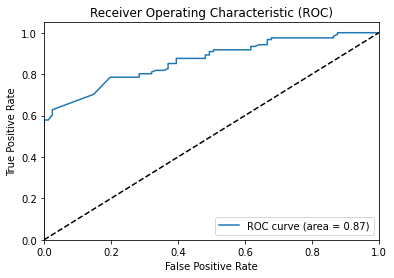

In [34]:
plot_roc(P3, YVALID)
# auc area is shown in the graph

In [ ]:
%%shell
jupyter nbconvert --to html /content/phrase4Report(final).ipynb

[NbConvertApp] Converting notebook /content/phrase4Report.ipynb to html
[NbConvertApp] Writing 397702 bytes to /content/phrase4Report.html
